In [16]:
#importing the libraries

import numpy as np 


In [17]:
import pandas as pd

In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, StandardScaler,PowerTransformer, PolynomialFeatures

In [20]:
from  sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

In [22]:
from sklearn import set_config

In [23]:
from sklearn.metrics import mean_squared_error, plot_confusion_matrix

In [24]:
#exploring the given data
data=pd.read_csv('C:/Users/HP/Downloads/fish.csv')
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [25]:
data.describe()


,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [27]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [28]:
data['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

<AxesSubplot:>

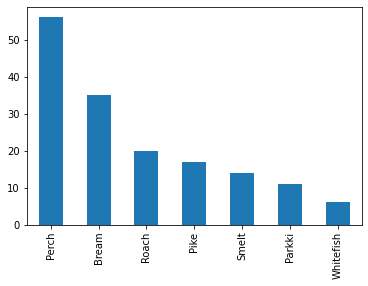

In [29]:
data['Species'].value_counts().plot.bar()

In [30]:
pd.crosstab(data.Species,data.Height,margins=True).style.background_gradient(cmap='Blues')

Height,1.7284,1.7388,1.972,1.9782,2.0832,2.0904,2.112,2.196,2.2044,2.2139,2.277,2.43,2.8728,2.9322,3.528,3.824,4.1472,4.588,4.5924,5.082,5.1376,5.1992,5.2185,5.2224,5.2983,5.5225,5.568,5.5756,5.6166,5.6358,5.64,5.6925,5.7078,5.8045,5.856,5.875,5.9175,5.9364,5.9532,6.11,6.1146,6.1677,6.216,6.275,6.2884,6.375,6.384,6.396,6.4,6.4395,6.4752,6.55,6.561,6.5772,6.6339,6.7334,6.792,6.825,6.8475,6.9153,6.96,7.0334,7.0516,7.0866,7.1672,7.168,7.28,7.2828,7.29,7.293,7.3968,7.4052,7.5344,7.5852,7.6156,7.68,7.786,7.792,7.8204,8.1454,8.323,8.3804,8.3922,8.5376,8.568,8.778,8.8768,8.8928,8.9262,9.396,9.485,9.6,9.7364,10.03,10.2565,10.3458,10.5717,10.6091,10.6863,10.744,10.812,10.835,10.881,11.088,11.135,11.1366,11.368,11.4884,11.52,11.73,11.7612,11.9286,11.9328,12.354,12.3778,12.3808,12.4313,12.444,12.48,12.4888,12.5125,12.604,12.67,12.73,12.8002,13.6024,13.7592,13.9129,14.0049,14.1795,14.2266,14.2628,14.3714,14.4738,14.8604,14.938,14.9544,15.1285,15.438,15.4686,15.5227,15.633,15.9936,16.2405,16.36,16.3618,16.517,16.8896,17.6235,18.0369,18.084,18.6354,18.7542,18.957,All
Species,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bream,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,35
Parkki,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11
Perch,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,1,0,1,0,0,0,1,1,2,0,0,1,1,1,0,1,2,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,2,0,1,0,1,0,1,1,0,0,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56
Pike,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17
Roach,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20
Smelt,1,1,1,1,1,1,0,1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14
Whitefish,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
All,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,159


In [31]:
print('Max length of fish:',data['Length1'].max())
print('Min length of fish:',data['Length1'].min())
print('Average length of fish:',data['Length1'].mean())

Max length of fish: 59.0
Min length of fish: 7.5
Average length of fish: 26.24716981132075


In [32]:
correlation=data.corr()
correlation

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


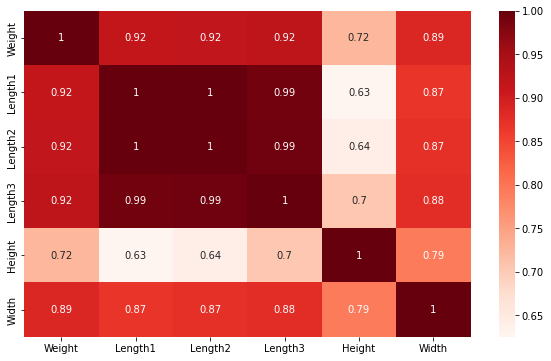

In [33]:
#checking the correlation between the given data features
plt.figure(figsize=(10,6))
sns.heatmap(correlation,cmap='Reds',annot=True)
plt.show()

In [34]:
#it can be seen that there is a high correlation between the variables

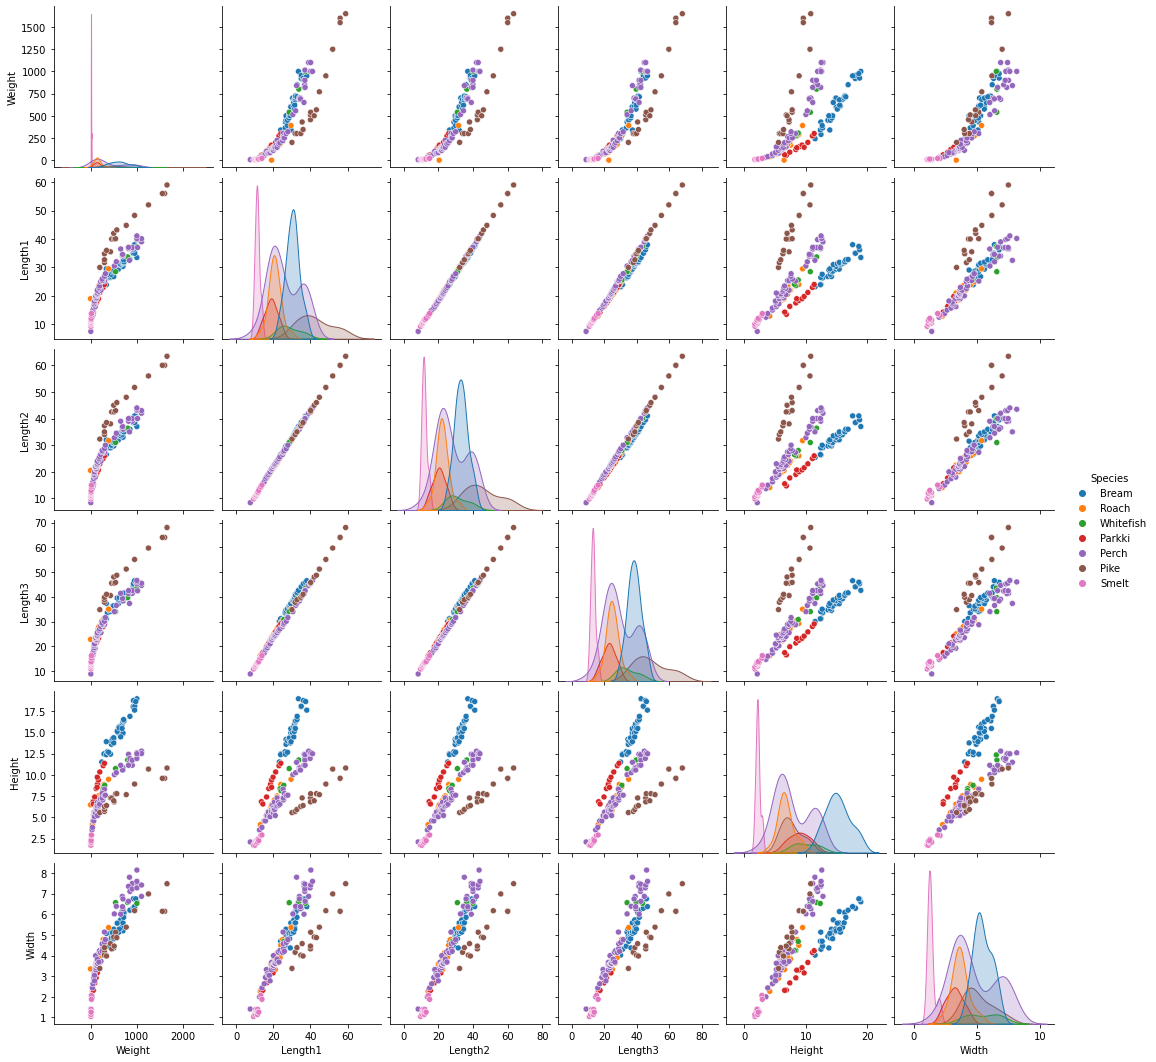

In [35]:
g= sns.pairplot(data, kind='scatter', hue='Species');

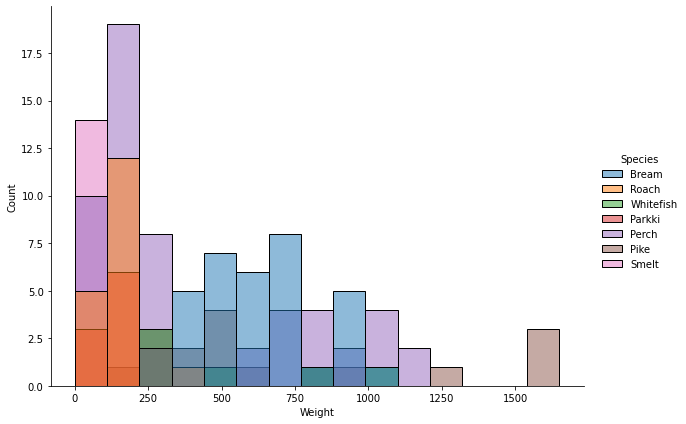

In [36]:
sns.displot(
  data=data,
  x="Weight",
  hue="Species",
  kind="hist",
  height=6,
  aspect=1.4,
  bins=15
)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

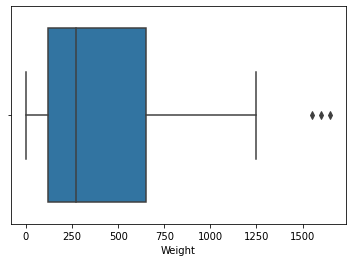

In [37]:
#weight column
sns.boxplot(data['Weight'])

In [38]:
fish_weight= data['Weight']
Q3= fish_weight.quantile(0.75)
Q1= fish_weight.quantile(0.25)
IQR= Q3-Q1
lower_limit= Q1-(1.5*IQR)
upper_limit= Q3+(1.5*IQR)

In [39]:
weight_outliers= fish_weight[(fish_weight <lower_limit) |(fish_weight >upper_limit)]
weight_outliers

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

In [40]:
#three values with outlier values

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length1'>

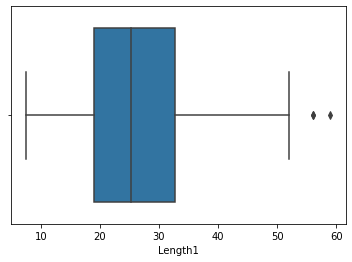

In [41]:
#Length1 column
sns.boxplot(data['Length1'])

In [42]:
#outlier
fish_length1= data['Length1']
Q3= fish_length1.quantile(0.75)
Q1= fish_length1.quantile(0.25)
IQR= Q3-Q1
lower_limit= Q1-(1.5*IQR)
upper_limitr= Q3+(1.5*IQR)
length1_outliers= fish_length1[(fish_length1<lower_limit)|(fish_length1>upper_limit)]
length1_outliers



Series([], Name: Length1, dtype: float64)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length2'>

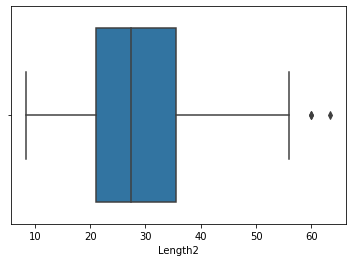

In [43]:
sns.boxplot(data['Length2'])

In [44]:
fish_Length2 = data['Length2']
Q3 = fish_Length2.quantile(0.75)
Q1 = fish_Length2.quantile(0.25)
IQR = Q3-Q1
lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 +(1.5*IQR)
length2_outliers = fish_Length2[(fish_Length2 <lower_limit) | (fish_Length2 >upper_limit)]
length2_outliers

142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length3'>

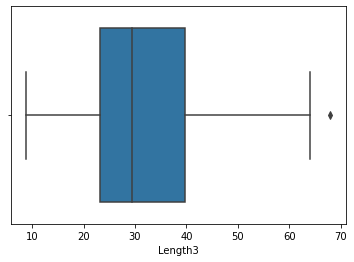

In [45]:
#length3 column
sns.boxplot(data['Length3'])

In [46]:
fish_Length3 = data['Length3']
Q3 = fish_Length3.quantile(0.75)
Q1 = fish_Length3.quantile(0.25)
IQR = Q3-Q1
lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 +(1.5*IQR)
length3_outliers = fish_Length3[(fish_Length3 <lower_limit) | (fish_Length3 >upper_limit)]
length3_outliers

144    68.0
Name: Length3, dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

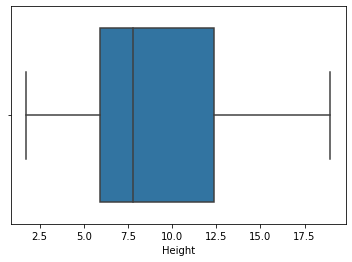

In [47]:
#height column
sns.boxplot(data['Height'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Width'>

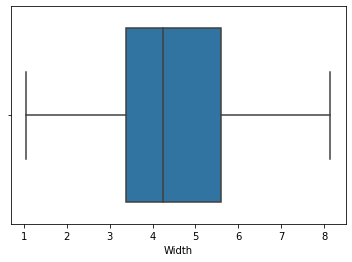

In [48]:
#width column
sns.boxplot(data['Width'])

In [49]:
data[142:145]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [50]:
#dropping these 3 rows
drop= data.drop([142,143,144])

In [51]:
drop.describe(percentiles=[0.05, 0.10, 0.25,0.50,0.75,0.90,0.99])

,Weight,Length1,Length2,Length3,Height,Width
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,375.217308,25.655769,27.786538,30.571154,8.951128,4.375719
std,319.546978,9.119630,9.792651,10.695359,4.324325,1.672188
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
5%,9.800000,11.300000,11.800000,13.100000,2.202300,1.282150
10%,25.950000,13.350000,14.500000,16.100000,3.676000,2.167600
25%,120.000000,19.000000,21.000000,23.025000,5.931675,3.369600
50%,271.000000,25.000000,26.750000,29.250000,7.647800,4.243300
75%,612.500000,32.125000,35.000000,39.425000,12.378550,5.424375
90%,900.000000,37.200000,40.000000,44.350000,15.283250,6.685400


In [52]:
#cleaning data
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler 

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

ct = make_column_transformer(
    (StandardScaler(),['Length1','Length2','Length3','Height','Width']), #turn all values from 0 to 1
    (OneHotEncoder(handle_unknown="ignore"), ["Species"])
)
#create X and y values
data_cleaned =   data.drop("Weight",axis=1)
y = data['Weight']

x_train, x_test, y_train, y_test = train_test_split(data_cleaned,y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((127, 6), (32, 6), (127,), (32,))

In [53]:
x_train.head()

,Species,Length1,Length2,Length3,Height,Width
75,Perch,15.0,16.2,17.2,4.5924,2.6316
138,Pike,43.2,46.0,48.7,7.7920,4.8700
2,Bream,23.9,26.5,31.1,12.3778,4.6961
86,Perch,20.0,22.0,23.5,6.1100,3.4075
45,Roach,20.5,22.5,25.3,7.0334,3.8203


In [67]:
X_train_normal = pd.DataFrame(ct.fit_transform(x_train))
X_test_normal = pd.DataFrame(ct.transform(x_test))

In [68]:
X_train_normal.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.130830,-1.148787,-1.220929,-1.062734,-1.104417,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.709250,1.659079,1.536085,-0.259441,0.270423,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.234492,-0.178283,-0.004342,0.891871,0.163613,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.627269,-0.602290,-0.669526,-0.681725,-0.627854,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.576913,-0.555178,-0.511983,-0.449896,-0.374310,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [69]:
#training the model
def models_score(model_name, train_data, y_train, val_data,y_val):
    model_list = ["Linear_Regression","Lasso_Regression","Ridge_Regression"]
    #model_1
    if model_name=="Linear_Regression":
        reg = LinearRegression()
    #model_2
    elif model_name=="Lasso_Regression":
      reg = Lasso(alpha=0.1,tol=0.03)
        
    #model_3
    elif model_name=="Ridge_Regression":
        reg = Ridge(alpha=1.0)
    else:
        print("please enter correct regressor name")
        
    if model_name in model_list:
        reg.fit(train_data,y_train)
        pred = reg.predict(val_data)
     
        score_MSE = mean_squared_error(pred, y_val)
        score_MAE = mean_absolute_error(pred, y_val)
        score_r2score = r2_score(pred, y_val)
        return round(score_MSE,2), round(score_MAE,2), round(score_r2score,2)

In [57]:
model_list = ["Linear_Regression","Lasso_Regression","Ridge_Regression"]
result_scores = []
for model in model_list:
    score = models_score(model,X_train_normal,y_train, X_test_normal,y_test)
    result_scores.append((model, score[0], score[1],score[2]))
    print(model,score)

Linear_Regression (7007.38, 65.3, 0.94)
Lasso_Regression (7720.81, 66.51, 0.93)
Ridge_Regression (7610.02, 69.12, 0.93)


In [58]:
#evaluating model
df_result_scores = pd.DataFrame(result_scores,columns=["model","mse","mae","r2score"])
df_result_scores

,model,mse,mae,r2score
0,Linear_Regression,7007.38,65.30,0.94
1,Lasso_Regression,7720.81,66.51,0.93
2,Ridge_Regression,7610.02,69.12,0.93


In [59]:
from scipy.stats import loguniform
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV

space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = loguniform(1e-5, 50)
model = Ridge()
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
search = RandomizedSearchCV(model, space, n_iter=100, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv,  random_state=1)
result = search.fit(X_train_normal, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -75.66232007195208
Best Hyperparameters: {'alpha': 0.24171039031894245, 'solver': 'sag'}


In [60]:
reg = Ridge(alpha=0.24171039031894245, solver ="sag" )
reg.fit(X_train_normal,y_train)
pred = reg.predict(X_test_normal)
score_MSE = mean_squared_error(pred, y_test)
score_MAE = mean_absolute_error(pred, y_test)
score_r2score = r2_score(pred, y_test)
to_append = ["Ridge_hyper_tuned",round(score_MSE,2), round(score_MAE,2), round(score_r2score,2)]
df_result_scores.loc[len(df_result_scores)] = to_append
df_result_scores

,model,mse,mae,r2score
0,Linear_Regression,7007.38,65.30,0.94
1,Lasso_Regression,7720.81,66.51,0.93
2,Ridge_Regression,7610.02,69.12,0.93
3,Ridge_hyper_tuned,7426.14,66.20,0.94


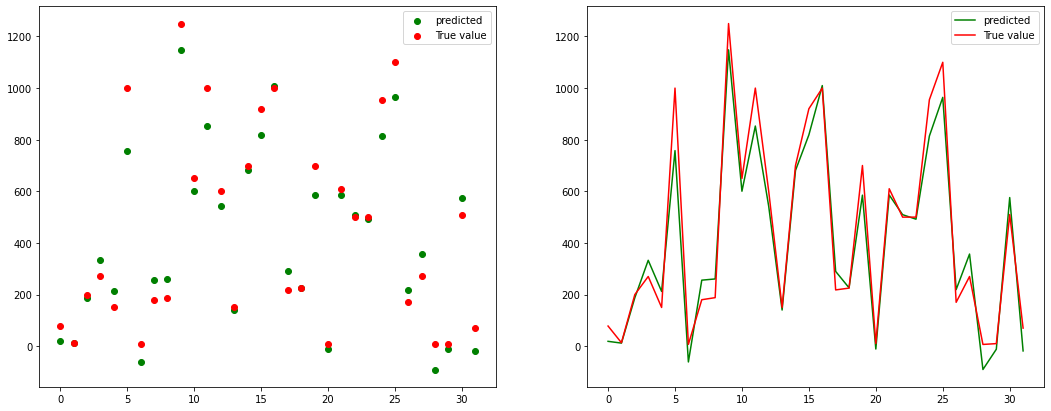

In [61]:
#choosing best model and making prediction
reg = LinearRegression()
reg.fit(X_train_normal,y_train)
pred = reg.predict(X_test_normal)
plt.figure(figsize=(18,7))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(range(0,len(X_test_normal)), pred,color="green",label="predicted")
plt.scatter(range(0,len(X_test_normal)), y_test,color="red",label="True value")
plt.legend()

plt.subplot(1, 2, 2) # index 2
plt.plot(range(0,len(X_test_normal)), pred,color="green",label="predicted")
plt.plot(range(0,len(X_test_normal)), y_test,color="red",label="True value")
plt.legend()
plt.show()
